### GMT492 FINAL TAKE-HOME EXAM

For this take-home exam you will use "ANKR.txt" file and analyse the long-term behaviour of the pressure data collected for ANKR station by the European Center for Medium Range Weather Forecasting research institute. The file consists of 6h resolution data between 2010 and 2019 and includes columns: 

- Site name
- Modified Julian Date (mjd)
- hydrostatic mf coefficient a_h
- wet mf coefficient a_w
- zenith hydrostatic delay (m)
- zenith wet delay (m)
- pressure at the site (hPa)
- temperature at the site (°C)
- water vapour pressure at the site (hPa)

There is no date column. However, you can create one by utilizing modified julian date column given in the file. The only meteorological data you will use is the pressure data. You will interpret the data and forecast pressure by using your own coding skills and time series analysis knowledge. Your exam is divided into 3 parts: Pre-processing, Sarima and Prophet. Write your own codes to complete the tasks and write your explanation as comment where necessary.

Data link: 
https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/ANKR.txt

**Take-Home Exam Dates**

- Start: 20.01.2021 10:00
- End: 22.01.2021 23:59


Please do not change this original .ipynb file, write your answers and upload it to the "evdekal" platform like you did in your mid-term exam. 


**Your tasks are given as below:**


##**1) Pre-processing (30 pt)**
- 1.1) Import the data into one dataframe you created (e.g. df = pd.read...)
    - Use appropriate seperator during importing the .txt file.
    
- 1.2) Rename column names in this dataframe as: <br> "site","mjd", "ah", "aw", "zhd", "zwd", "pres", "temp", "wvp".
<br>
- 1.3) Convert the mjd column to calendar date (year-month-day hour:min:sec) using "julian" python library and name this new column as "date" in your dataframe. 
    - You can use the lambda function to fulfill this request. As a result, you have to obtain date column with 6h frequency between 2010 and 2019. 
    - After creating the "date" column drop the "mjd" column from the table.
- 1.4) Resample your 6 hourly data to monthly mean values. You will analyze this monthly data in your exam.
- 1.5) Filter the "date" and "pres" columns but do not change the dataframe name (i.e., df). You can use either pandas.filter or pandas.drop commands. 
- 1.6) Set the "date" column in the dataframe (df) as index.
- 1.7) Plot the pressure(pres) data with a title and labels (x, y) included. You are free to write any title and label names you want.

## **2) SARIMA (40 pt)**


- 2.1) Run the "Augmented Dickey-Fuller" (AFD) test to check data stationarity of ANKR's pressure data. 
    - Find an order of differencing that need to be applied to reach a stationarity for the pressure time series. Code your answer and plot the differenced data.
- 2.2) Run an ETS Decomposition on your data and explain the results based on plotted graphs (e.g., what can you say about seasonality and trend components). 
- 2.3) Run the ACF and PACF plots on pressure data and desribe the results.
- 2.4) Run auto-arima stepwise search to find appropriate p,d,q and P,D,Q terms.
    - Start from minimum starting value of 0 for p, q and P,Q and search up to order 5 for p,q,P,Q to find the best model to forecast future values. Do not forget to add "d" the order of first-differencing you detected in the previous step. In addtion, use error_action='ignore' and suppress_warnings=True while running your code.
- 2.5) Split the data into train-test sets(i.e., 96 months train, 12 months test). Fit your model on the train set based on your p,d,q and P,D,Q terms obtained with auto-arima and ADF runs.
- 2.6) Obtain predicted values and compare them with the expected values.
- 2.7) Check (evaluate) your model accuracy (root mean squared error) on the test set.
- 2.8) Retrain the model on the full data, and forecast 12 months ahead. Print and plot the forecasted results. 



## **3) Prophet (30 pt)**


- 3.1) Format your dataframe (df) with renamed columns:"ds", "y"
- 3.2) Create and fit your model using Facebook's Prophet library on pressure data (y).
- 3.3) Extend your "ds" column into the future (12 months) by using Prophet's make_future_dataframe method.
- 3.4) Predict the future (12 months) using the Prophet's predict method. Print the forecasted object ('ds', 'yhat', 'yhat_lower', 'yhat_upper') and plot the forecast data by using prophet.plot method.
- 3.5) Use the Prophet.plot_components method to see the forecast components (trend and yearly seasonality).
- 3.6) Calculate RMSE between original(true) and predicted values of your model (forecast).
- 3.7) Use the same df dataframe but this time split the data into train-test sets (i.e., 96 months train, 12 months test). Fit your prophet model on the train set and predict 12 months into the future. Evaluate predicted value with the original ones over RMSE value. Plot the predicted forecast and plot the forecasted components(seasonality and trend).

GOOD LUCK...

# **ANSWERS**

In [1]:
import pandas as pd
import numpy as np

import datetime
import calendar
import seaborn as sns
from datetime import datetime as dt

import julian #pip install julian into the conda cmd


url="https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/ANKR.txt"
#Importing the data. column separetor is s+. I did't use sep='  ' because space separator not always same. It can be 2,3,4 blanked space
db=pd.read_csv(url, header=None, delimiter=r"\s+",  engine='python')  





In [2]:
# 1.2) 
#Renaming those 9 columns
db.columns = ["site","mjd", "ah", "aw", "zhd", "zwd", "pres", "temp", "wvp"]
print(db)

       site       mjd        ah        aw     zhd     zwd    pres   temp   wvp
0      ANKR  55197.00  0.001218  0.000530  2.0640  0.0716  904.64   7.18  5.26
1      ANKR  55197.25  0.001218  0.000552  2.0597  0.0600  903.00   5.35  4.81
2      ANKR  55197.50  0.001220  0.000507  2.0509  0.0554  898.73  12.93  7.07
3      ANKR  55197.75  0.001218  0.000544  2.0483  0.0722  897.71  12.53  6.98
4      ANKR  55198.00  0.001214  0.000546  2.0492  0.0722  898.29   9.67  7.38
...     ...       ...       ...       ...     ...     ...     ...    ...   ...
13143  ANKR  58482.75  0.001189  0.000497  2.0803  0.0407  912.14  -1.85  3.57
13144  ANKR  58483.00  0.001186  0.000512  2.0801  0.0405  912.08  -3.82  3.26
13145  ANKR  58483.25  0.001187  0.000473  2.0829  0.0369  913.11  -5.92  3.22
13146  ANKR  58483.50  0.001187  0.000519  2.0804  0.0381  912.32  -4.46  4.07
13147  ANKR  58483.75  0.001190  0.000482  2.0854  0.0359  914.32  -5.42  3.71

[13148 rows x 9 columns]


In [3]:
# 1.3)
#Calculating Calendar date
liste=[] 
lenght=len(db) #Calculating how many rows in the data
print(lenght)
for i in range(lenght): 
    mjd=db.loc[i][1] #Getting Julian Date data from mjd column
    date=julian.from_jd(mjd,fmt='mjd') #Calculating Julian date.
    liste.append(date) #Adding calculated values into new list
    
db['date']=liste #now our list values are also our date column

db['date'] = pd.to_datetime(db['date']).dt.date #Filtering the h-min-sec. So only Y-M-D  will be visible
db.set_index('date') #Setting index

print(db)

13148
       site       mjd        ah        aw     zhd     zwd    pres   temp  \
0      ANKR  55197.00  0.001218  0.000530  2.0640  0.0716  904.64   7.18   
1      ANKR  55197.25  0.001218  0.000552  2.0597  0.0600  903.00   5.35   
2      ANKR  55197.50  0.001220  0.000507  2.0509  0.0554  898.73  12.93   
3      ANKR  55197.75  0.001218  0.000544  2.0483  0.0722  897.71  12.53   
4      ANKR  55198.00  0.001214  0.000546  2.0492  0.0722  898.29   9.67   
...     ...       ...       ...       ...     ...     ...     ...    ...   
13143  ANKR  58482.75  0.001189  0.000497  2.0803  0.0407  912.14  -1.85   
13144  ANKR  58483.00  0.001186  0.000512  2.0801  0.0405  912.08  -3.82   
13145  ANKR  58483.25  0.001187  0.000473  2.0829  0.0369  913.11  -5.92   
13146  ANKR  58483.50  0.001187  0.000519  2.0804  0.0381  912.32  -4.46   
13147  ANKR  58483.75  0.001190  0.000482  2.0854  0.0359  914.32  -5.42   

        wvp        date  
0      5.26  2010-01-01  
1      4.81  2010-01-01  
2  

In [4]:
#1.4

db2=db 
db2=db.filter(items=['date','pres'])

db['date'] = pd.to_datetime(db['date'])
#Resampling data to month instead of 6 hours. The resample function does not work with a to_datetime function above here.
db=db.resample('M',on='date').mean()

print(db)


                  mjd        ah        aw       zhd       zwd        pres  \
date                                                                        
2010-01-31  55212.375  0.001200  0.000516  2.068425  0.061962  906.785968   
2010-02-28  55241.875  0.001202  0.000521  2.060611  0.070207  903.357679   
2010-03-31  55271.375  0.001208  0.000526  2.070995  0.067394  907.972258   
2010-04-30  55301.875  0.001214  0.000517  2.070678  0.074215  907.943583   
2010-05-31  55332.375  0.001229  0.000523  2.065432  0.087308  905.798548   
...               ...       ...       ...       ...       ...         ...   
2018-08-31  58346.375  0.001253  0.000546  2.066181  0.121313  906.441855   
2018-09-30  58376.875  0.001241  0.000533  2.074546  0.108483  909.687917   
2018-10-31  58407.375  0.001228  0.000515  2.079825  0.095777  911.797419   
2018-11-30  58437.875  0.001214  0.000509  2.080385  0.074596  911.947833   
2018-12-31  58468.375  0.001201  0.000519  2.073810  0.064910  909.059516   

In [5]:
#1.5

#Filtering the unused datas and then we will have only pres data
db=db.filter(items=['date','pres'])

print(db)

                  pres
date                  
2010-01-31  906.785968
2010-02-28  903.357679
2010-03-31  907.972258
2010-04-30  907.943583
2010-05-31  905.798548
...                ...
2018-08-31  906.441855
2018-09-30  909.687917
2018-10-31  911.797419
2018-11-30  911.947833
2018-12-31  909.059516

[108 rows x 1 columns]


In [7]:
#1.6
# db.set_index('date') Done in part 1.3

Text(0.5, 0, 'dates')

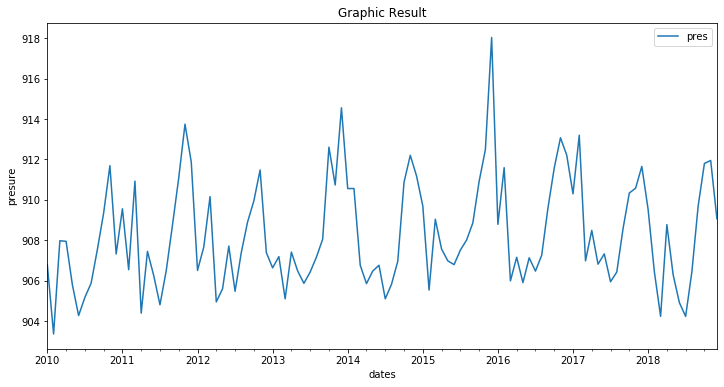

In [6]:
#1.7
ax=db.plot(y='pres',figsize=(12,6),title='Graphic Result')
ax.set_ylabel('presure')
ax.set_xlabel('dates')



In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

from statsmodels.tsa.stattools import adfuller

ADF Statistic: -9.13491585152117
p-value: 2.953465320362552e-15
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


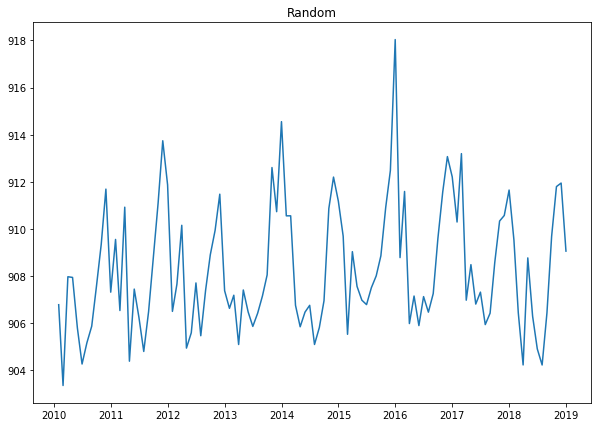

In [8]:
#2.1

# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
# The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.   

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(db);
plt.title('Random');

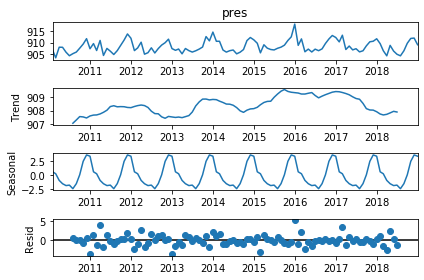

In [9]:
#2.2
result = seasonal_decompose(db['pres'], model='add')
result.plot();

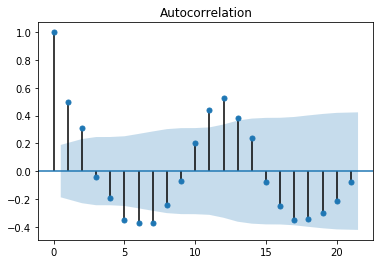

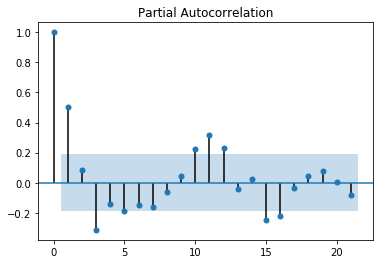

In [10]:
#2.3
from matplotlib import pyplot
#acf
plot_acf(db)
pyplot.show()
#pacf
plot_pacf(db)
pyplot.show()

In [11]:
#2.4
auto_arima(db['pres'],seasonal=True,m=12).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -232.169
Date:                            Fri, 22 Jan 2021   AIC                            476.337
Time:                                    12:56:55   BIC                            492.430
Sample:                                         0   HQIC                           482.862
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    419.2081    115.944      3.616      0.000     191.962     646.455
ar.L1          0.1827      0.131      1.398      0.162      -0.074       0.439
ar.L2         -0.0039      0.126     -0.031      0.976      -0.251       0.243
ar.S.L12       0.2122      0.121      1.757      0.079      -0.025       0.449
ar.S.L24       0.2258      0.109      2.064      0.039       0.011       0.440
sigma2         4.9127      0.830      5.916      0.000       3.285       6.540
===================================================================================
Ljung-Box (Q):                      103.15   Jarque-Bera (JB):                 6.57
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.80   Skew:                             0.48
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
#2.5
train = db.iloc[:96]
test = db.iloc[96:]

model = SARIMAX(train['pres'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 pres   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -197.900
Date:                              Fri, 22 Jan 2021   AIC                            407.799
Time:                                      12:56:56   BIC                            423.122
Sample:                                  01-31-2010   HQIC                           413.991
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8789      0.115     -7.669      0.000      -1.104      -0.654
ma.L2          0.1415      0.154      0.921      0.357      -0.160       0.443
ma.L3         -0.2311      0.114     -2.028      0.043      -0.454      -0.008
ar.S.L12       0.9396      0.067     14.001      0.000       0.808       1.071
ma.S.L12      -0.6510      0.179     -3.635      0.000      -1.002      -0.300
sigma2         3.3579      0.407      8.259      0.000       2.561       4.155
===================================================================================
Ljung-Box (Q):                       35.77   Jarque-Bera (JB):                16.37
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.62
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#2.6
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['pres'][i]}")

predicted=909.200999 , expected=909.5319354838713
predicted=910.2224477, expected=906.4448214285716
predicted=907.8567349, expected=904.2304032258068
predicted=908.0168176, expected=908.7718333333329
predicted=907.2842183, expected=906.2954838709677
predicted=907.6431933, expected=904.9094999999995
predicted=907.0032283, expected=904.2282258064516
predicted=907.5814873, expected=906.4418548387094
predicted=909.0401962, expected=909.6879166666669
predicted=910.8729351, expected=911.7974193548391
predicted=911.5993414, expected=911.9478333333334
predicted=912.2499227, expected=909.0595161290327


In [14]:
#2.7
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
#error1 = mean_squared_error(test['pres'], predictions)
error2 = rmse(test['pres'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error2:11.10}')


SARIMA(0,1,3)(1,0,1,12) RMSE Error: 2.181832924


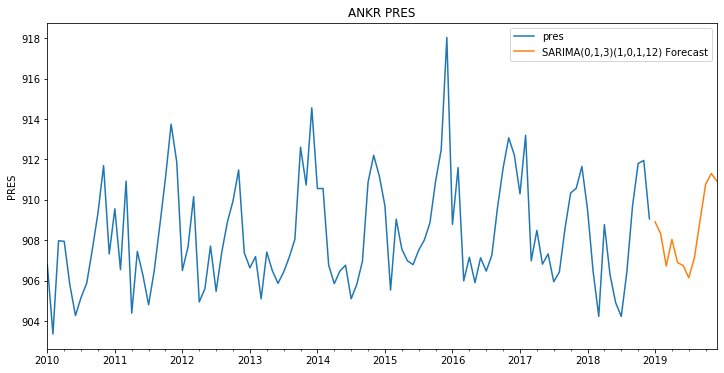

In [15]:
#2.8
model = SARIMAX(db['pres'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(db),len(db)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

title='ANKR PRES'
ylabel='PRES'
xlabel=''

ax = db['pres'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [16]:
#3.1

#db['date'] = pd.date_range(start='1/31/2010', periods=len(db), freq='M')
#print(db['date'])
#print(db['pres'])


db2.columns = ['ds','y']
db2['ds']=pd.to_datetime(db2['ds'])
print(db2)


              ds       y
0     2010-01-01  904.64
1     2010-01-01  903.00
2     2010-01-01  898.73
3     2010-01-01  897.71
4     2010-01-02  898.29
...          ...     ...
13143 2018-12-30  912.14
13144 2018-12-31  912.08
13145 2018-12-31  913.11
13146 2018-12-31  912.32
13147 2018-12-31  914.32

[13148 rows x 2 columns]


In [17]:
#3.2
#conda install gcc
#conda instal -c conda-forge fbprophet
from fbprophet import Prophet

#fbprophet and pystan downgraded with functions below here because prophet does not work with up to date version
# The error name before downgrade the version KeyError: 'metric_file'
#conda install pystan=2.19.0.0
#conda install -c conda-forge fbprophet=0.6.0

m=Prophet()
m.fit(db2)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Hp\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [18]:
#3.3
future=m.make_future_dataframe(periods=12,freq='MS')

In [19]:
#3.4
future.tail()
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,906.816441,900.854638,912.419805
1,2010-01-01,906.816441,901.028495,912.530909
2,2010-01-01,906.816441,901.050679,912.284184
3,2010-01-01,906.816441,901.279351,912.394945
4,2010-01-02,906.742927,900.872837,912.240772


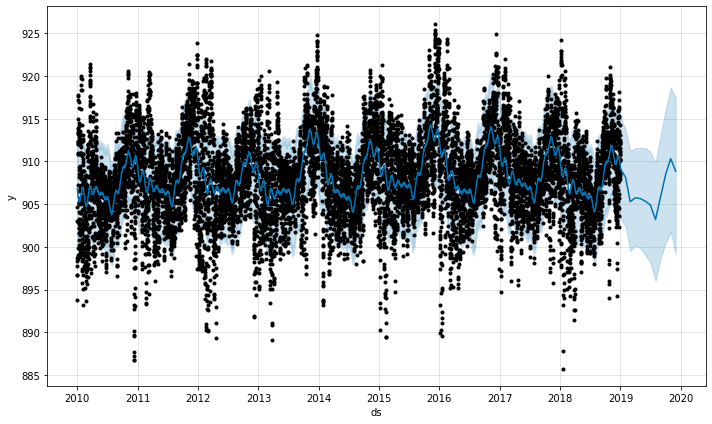

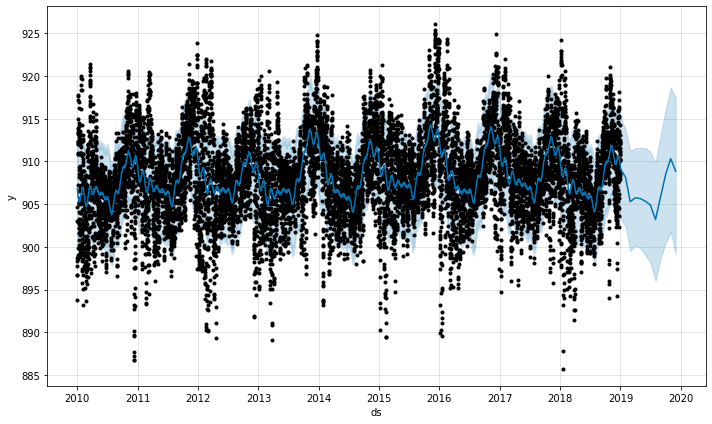

In [20]:
#3.5
m.plot(forecast)

In [22]:
#3.6
rmserror = rmse(db2['y'],forecast.iloc[:13148,1])
print(rmserror)

4.923154722585738


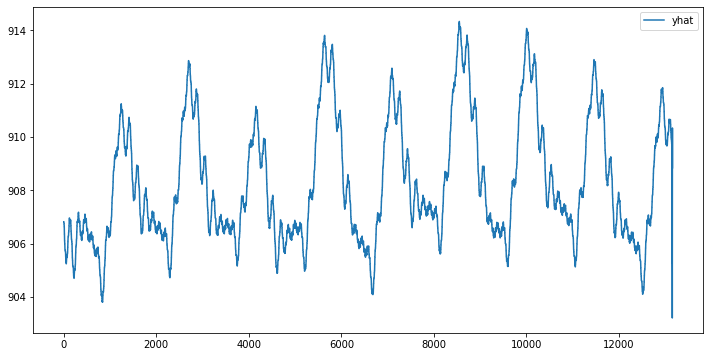

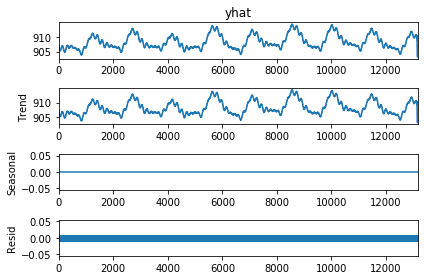

In [24]:
#3.7

train = db2.iloc[:96]
test = db2.iloc[96:]

start=len(train)
end=len(train)+len(test)-1

#predicting m which is fitted model
#predictions = m.predict(start=start, end=end, dynamic=False, typ='levels')

#rmserror2= rmse(db['y'],predictions)

#ploting forecast with y 
forecast.plot(y='yhat',figsize=(12,6))

#Plotinng seasonality and trend
result = seasonal_decompose(forecast['yhat'], model='add',period=1)
result.plot();